In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('/Users/jugalmarfatia/Documents/fall 2018/google_trends_stocks/Google-trends-stock-data/data/dow-jones-industrial-average-components.xls', header=2)

In [2]:
dji_list = df['Ticker Symbol'].dropna().unique()

In [3]:
dji_list

array(['MMM', 'AXP', 'AAPL', 'CAT', 'CVX', 'CSCO', 'DWDP', 'XOM', 'INTC',
       'IBM', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE', 'PFE', 'BA',
       'KO', 'GS', 'HD', 'PG', 'TRV', 'DIS', 'UTX', 'UNH', 'VZ', 'V',
       'WBA', 'WMT'], dtype=object)

In [4]:
dji_gt_data = pd.DataFrame()

for i in dji_list:
    df1 = pd.read_csv('/Users/jugalmarfatia/Documents/fall 2018/google_trends_stocks/Google-trends-stock-data/data/google_trends/weekly/' + str(i) + '_gt.csv')
    dji_gt_data = dji_gt_data.append(df1)

dji_gt_data.head()

,Unnamed: 0,date,gt_index,isPartial,stock_symbol
0,0,2013-09-29 00:00:00,8,False,MMM
1,1,2013-10-06 00:00:00,9,False,MMM
2,2,2013-10-13 00:00:00,13,False,MMM
3,3,2013-10-20 00:00:00,19,False,MMM
4,4,2013-10-27 00:00:00,16,False,MMM


In [5]:
dji_gt_data = dji_gt_data.set_index(['stock_symbol'])
df_temp = dji_gt_data.groupby(['stock_symbol']).mean()
df_temp.rename(index=str, columns={"gt_index": "gt_index_sum"}, inplace = True)

In [6]:
dji_gt_data = dji_gt_data.join(df_temp['gt_index_sum']).reset_index()

In [7]:
dji_gt_data['adjusted_gt_index'] = (dji_gt_data['gt_index'] - dji_gt_data['gt_index_sum']) / dji_gt_data['gt_index'].std()

In [8]:
dji_gt_data['date'] = pd.to_datetime(dji_gt_data['date'])
dji_gt_data['day_of_week'] = dji_gt_data['date'].dt.weekday_name

In [9]:
dji_gt_data['m_date'] = pd.to_datetime(dji_gt_data['date']).apply(pd.DateOffset(1))

In [10]:
dji_gt_data = dji_gt_data[['gt_index', 'adjusted_gt_index', 'stock_symbol', 'date', 'm_date']]

In [11]:
dji_gt_data = dji_gt_data.set_index(['stock_symbol', 'm_date'])

In [12]:
dji_list = np.append(dji_list, ['^DJI'])

In [13]:
dji_stock_data = pd.DataFrame()

for i in dji_list:
    df1 = pd.read_csv('/Users/jugalmarfatia/Documents/fall 2018/google_trends_stocks/Google-trends-stock-data/data/stock_prices/' + str(i) + '_price.csv')
    dji_stock_data = dji_stock_data.append(df1)

dji_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,stock
0,2013-01-02,94.190002,94.790001,93.959999,94.779999,82.296341,3206700,MMM
1,2013-01-03,94.339996,94.930000,94.129997,94.669998,82.200836,2704600,MMM
2,2013-01-04,94.790001,95.480003,94.540001,95.370003,82.808632,2704900,MMM
3,2013-01-07,95.019997,95.730003,94.760002,95.489998,82.912849,2745800,MMM
4,2013-01-08,95.169998,95.750000,95.099998,95.500000,82.921501,2655500,MMM


In [14]:
dji_stock_data['date'] = pd.to_datetime(dji_stock_data['Date'])
dji_stock_data['day_of_week'] = dji_stock_data['date'].dt.weekday_name
dji_stock_data_monday = dji_stock_data[dji_stock_data['day_of_week'] == 'Monday']
dji_stock_data_friday = dji_stock_data[dji_stock_data['day_of_week'] == 'Friday']

In [15]:
dji_stock_data_friday['m_date'] = pd.to_datetime(dji_stock_data_friday['date']).apply(pd.DateOffset(-4))
dji_stock_data_monday['m_date'] = dji_stock_data_monday['date']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [16]:
dji_stock_data_monday = dji_stock_data_monday[['Open', 'stock', 'm_date']]

In [17]:
dji_stock_data_friday['day_of_week_m'] = dji_stock_data_friday['m_date'].dt.weekday_name

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
dji_stock_data_friday = dji_stock_data_friday[['Close', 'stock', 'm_date']]

In [19]:
dji_stock_data_monday.rename(index=str, columns={"Open": "open_monday", "stock": "stock_symbol"}, inplace = True)
dji_stock_data_friday.rename(index=str, columns={"Close": "close_friday", "stock": "stock_symbol"}, inplace = True)

dji_index_monday = dji_stock_data_monday[dji_stock_data_monday['stock_symbol'] == '^DJI'].set_index(['m_date'])
dji_index_friday = dji_stock_data_friday[dji_stock_data_friday['stock_symbol'] =='^DJI'].set_index(['m_date'])
dji_index = dji_index_monday.join(dji_index_friday, lsuffix='r')
dji_index['dji_return'] =  (dji_index.open_monday - dji_index.close_friday) *100 / dji_index.open_monday

In [20]:
dji_stock_data_monday = dji_stock_data_monday.set_index(['stock_symbol', 'm_date'])
dji_stock_data_monday.head()

open_monday
stock_symbol m_date                 
MMM          2013-01-07    95.019997
             2013-01-14    96.400002
             2013-01-28   100.980003
             2013-02-04   100.769997
             2013-02-11   102.389999

In [21]:
dji_stock_data_friday = dji_stock_data_friday.set_index(['stock_symbol', 'm_date'])
dji_stock_data_friday.head()

close_friday
stock_symbol m_date                  
MMM          2012-12-31     95.370003
             2013-01-07     96.279999
             2013-01-14     98.739998
             2013-01-21    100.589996
             2013-01-28    101.559998

In [22]:
df_final = dji_gt_data.join(dji_stock_data_monday.join(dji_stock_data_friday))
df_final = df_final.join(dji_index['dji_return'])
df_final.head()

gt_index  adjusted_gt_index       date  open_monday  \
stock_symbol m_date                                                            
AAPL         2013-09-30        20          -0.420747 2013-09-29    68.178574   
             2013-10-07        19          -0.474552 2013-10-06    69.508568   
             2013-10-14        22          -0.313138 2013-10-13    69.975716   
             2013-10-21        25          -0.151725 2013-10-20    73.110001   
             2013-10-28        26          -0.097920 2013-10-27    75.577141   

                         close_friday  dji_return  
stock_symbol m_date                                
AAPL         2013-09-30     69.004288    1.162245  
             2013-10-07     70.401428   -1.113592  
             2013-10-14     72.698570   -1.105093  
             2013-10-21     75.137146   -1.097049  
             2013-10-28     74.290001   -0.297764

In [23]:
import numpy as np

df_final['percent_change'] = (df_final.open_monday - df_final.close_friday) *100 / df_final.open_monday 
df_final['abs_percent_change'] = np.abs((df_final.open_monday - df_final.close_friday) / df_final.open_monday) *100

df_final['excess_percent_change'] = df_final['percent_change'] - df_final['dji_return']

df_final['postive_change_dummy'] = (df_final['percent_change'] >0).astype(int)
df_final['postive_excess_change_dummy'] = (df_final['excess_percent_change'] >0).astype(int)

## Scatter plot where x_axis = GTI, y_axis =  excess_percent_change in comparison to DJI index

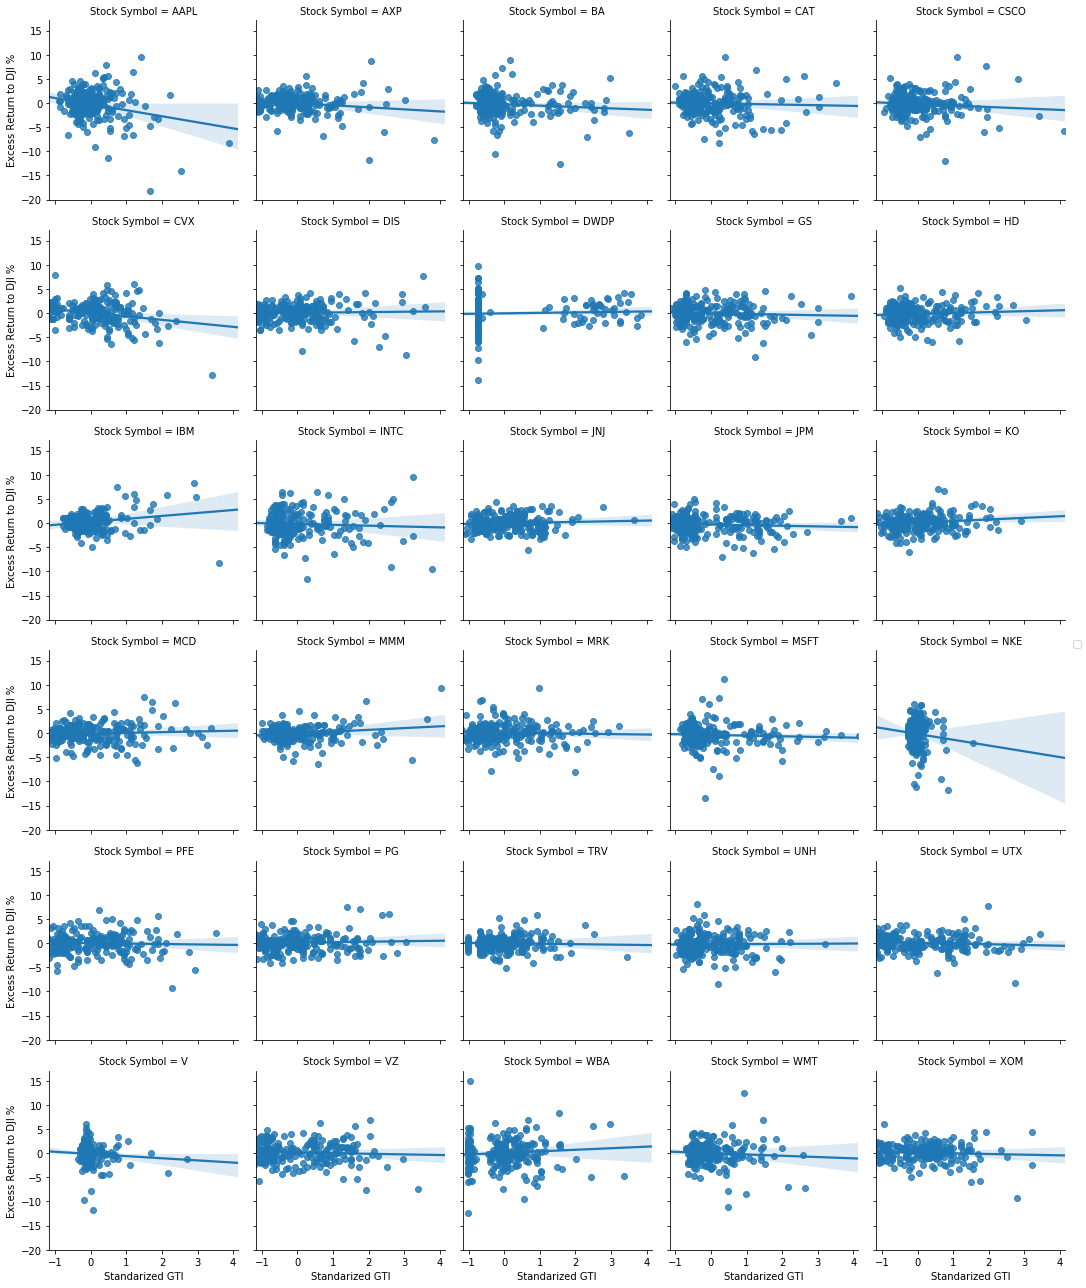

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

df_temp1 = df_final.reset_index()
df_temp1.rename(index=str, columns={"stock_symbol": "Stock Symbol", "adjusted_gt_index": "Standarized GTI", 
                                   "excess_percent_change": "Excess Return to DJI %"}, inplace = True)
g = sns.FacetGrid(df_temp1, col="Stock Symbol", col_wrap=5)
g.map(sns.regplot, "Standarized GTI", "Excess Return to DJI %")
g.add_legend()

g.savefig("/Users/jugalmarfatia/Documents/fall 2018/google_trends_stocks/Google-trends-stock-data/results/figure_1.pdf")

## Plot GTI for few stocks to show trends

In [25]:
import plotly.plotly as py
import cufflinks as cf
import plotly.graph_objs as go

df = pd.pivot_table(df_final.reset_index(), values='gt_index', index=['m_date'],
                    columns=['stock_symbol'], aggfunc=np.sum)

figure = df[['AAPL',  'VZ', 'NKE',]].iplot(kind='scatter',asFigure=True)
figure['layout']['yaxis1'].update({'title': 'Google Trends Index'})
figure['layout'].update(title='GTI for Apple, Version and Nike')

py.iplot(figure, filename='figure2')


## Plot Standarized GTI for few stocks to show trends and difference from unadjusted

In [26]:
df = pd.pivot_table(df_final.reset_index(), values='adjusted_gt_index', index=['m_date'],
                    columns=['stock_symbol'], aggfunc=np.sum)

figure = df[['AAPL',  'VZ', 'NKE',]].iplot(kind='scatter', asFigure=True)
figure['layout']['yaxis1'].update({'title': 'Standardized Google Trends Index'})
figure['layout'].update(title='Standardized GTI for Apple, Version and Nike')

py.iplot(figure, filename='figure3')

In [27]:
df_final['gt_index_lag1'] = df_final['gt_index'].shift(1)
df_final['adjusted_gt_index_lag1'] = df_final['adjusted_gt_index'].shift(1)
df_final.head()

gt_index  adjusted_gt_index       date  open_monday  \
stock_symbol m_date                                                            
AAPL         2013-09-30        20          -0.420747 2013-09-29    68.178574   
             2013-10-07        19          -0.474552 2013-10-06    69.508568   
             2013-10-14        22          -0.313138 2013-10-13    69.975716   
             2013-10-21        25          -0.151725 2013-10-20    73.110001   
             2013-10-28        26          -0.097920 2013-10-27    75.577141   

                         close_friday  dji_return  percent_change  \
stock_symbol m_date                                                 
AAPL         2013-09-30     69.004288    1.162245       -1.211105   
             2013-10-07     70.401428   -1.113592       -1.284532   
             2013-10-14     72.698570   -1.105093       -3.891141   
             2013-10-21     75.137146   -1.097049       -2.772733   
             2013-10-28     74.290001   -0.297764        1.703081   

                         abs_percent_change  excess_percent_change  \
stock_symbol m_date                                                  
AAPL         2013-09-30            1.211105              -2.373350   
             2013-10-07            1.284532              -0.170940   
             2013-10-14            3.891141              -2.786049   
             2013-10-21            2.772733              -1.675684   
             2013-10-28            1.703081               2.000845   

                         postive_change_dummy  postive_excess_change_dummy  \
stock_symbol m_date                                                          
AAPL         2013-09-30                     0                            0   
             2013-10-07                     0                            0   
             2013-10-14                     0                            0   
             2013-10-21                     0                            0   
             2013-10-28                     1                            1   

                         gt_index_lag1  adjusted_gt_index_lag1  
stock_symbol m_date                                             
AAPL         2013-09-30            NaN                     NaN  
             2013-10-07           20.0               -0.420747  
             2013-10-14           19.0               -0.474552  
             2013-10-21           22.0               -0.313138  
             2013-10-28           25.0               -0.151725

## Fixed effect with only 1 lag value. Dep Var = excess_percent_change

In [28]:
from linearmodels import PanelOLS
from linearmodels.panel import PooledOLS
import statsmodels.api as sm

exog_vars = ['adjusted_gt_index']

exog_mean = sm.add_constant(df_final[exog_vars])
mod = PanelOLS(df_final.excess_percent_change, exog_mean, entity_effects=True, time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res.summary)


                            PanelOLS Estimation Summary                            
Dep. Variable:     excess_percent_change   R-squared:                        0.0022
Estimator:                      PanelOLS   R-squared (Between):             -0.0029
No. Observations:                   6780   R-squared (Within):              -0.0008
Date:                   Thu, Nov 08 2018   R-squared (Overall):             -0.0008
Time:                           10:57:21   Log-likelihood                 -1.47e+04
Cov. Estimator:                Clustered                                           
                                           F-statistic:                      14.083
Entities:                             30   P-value                           0.0002
Avg Obs:                          226.00   Distribution:                  F(1,6524)
Min Obs:                          226.00                                           
Max Obs:                          226.00   F-statistic (robust):            

/anaconda3/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



## Fixed effect with only 1 lag value. Dep Var = postive_excess_change_dummy

In [29]:
mod = PanelOLS(df_final.postive_excess_change_dummy, exog_mean, entity_effects=True, time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res.summary)

                               PanelOLS Estimation Summary                               
Dep. Variable:     postive_excess_change_dummy   R-squared:                        0.0008
Estimator:                            PanelOLS   R-squared (Between):              0.0000
No. Observations:                         7830   R-squared (Within):              -0.0024
Date:                         Thu, Nov 08 2018   R-squared (Overall):             -0.0023
Time:                                 10:57:22   Log-likelihood                   -4849.6
Cov. Estimator:                      Clustered                                           
                                                 F-statistic:                      5.7018
Entities:                                   30   P-value                           0.0170
Avg Obs:                                261.00   Distribution:                  F(1,7539)
Min Obs:                                261.00                                           
Max Obs:  

In [30]:
df_final = df_final.reset_index()
df_final.loc[df_final.m_date == ('2013-09-30'),'gt_index_lag1'] = np.nan 
df_final.loc[df_final.m_date == ('2013-09-30'),'adjusted_gt_index_lag1'] = np.nan 
df_final = df_final.set_index(['stock_symbol', 'm_date'])

## Fixed effect with only 2 lag value. Dep Var = excess_percent_change

In [31]:
exog_vars = ['adjusted_gt_index', 'adjusted_gt_index_lag1']

exog_mean = sm.add_constant(df_final[exog_vars])
mod = PanelOLS(df_final.excess_percent_change, exog_mean, entity_effects=True, time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res.summary)


                            PanelOLS Estimation Summary                            
Dep. Variable:     excess_percent_change   R-squared:                        0.0038
Estimator:                      PanelOLS   R-squared (Between):             -0.0159
No. Observations:                   6750   R-squared (Within):               0.0031
Date:                   Thu, Nov 08 2018   R-squared (Overall):              0.0030
Time:                           10:57:22   Log-likelihood                -1.463e+04
Cov. Estimator:                Clustered                                           
                                           F-statistic:                      12.486
Entities:                             30   P-value                           0.0000
Avg Obs:                          225.00   Distribution:                  F(2,6494)
Min Obs:                          225.00                                           
Max Obs:                          225.00   F-statistic (robust):            

/anaconda3/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



## Fixed effect with only 2 lag value. Dep Var = postive_excess_change_dummy

In [32]:
mod = PanelOLS(df_final.postive_excess_change_dummy, exog_mean, entity_effects=True, time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res.summary)


/anaconda3/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



                               PanelOLS Estimation Summary                               
Dep. Variable:     postive_excess_change_dummy   R-squared:                        0.0018
Estimator:                            PanelOLS   R-squared (Between):             -0.0004
No. Observations:                         7800   R-squared (Within):              -0.0027
Date:                         Thu, Nov 08 2018   R-squared (Overall):             -0.0027
Time:                                 10:57:22   Log-likelihood                   -4832.0
Cov. Estimator:                      Clustered                                           
                                                 F-statistic:                      6.6488
Entities:                                   30   P-value                           0.0013
Avg Obs:                                260.00   Distribution:                  F(2,7509)
Min Obs:                                260.00                                           
Max Obs:  

In [33]:
df_final['gt_index_lag2'] = df_final['gt_index'].shift(2)
df_final['adjusted_gt_index_lag2'] = df_final['adjusted_gt_index'].shift(2)
df_final['gt_index_lag3'] = df_final['gt_index'].shift(3)
df_final['adjusted_gt_index_lag3'] = df_final['adjusted_gt_index'].shift(3)
df_final.head()

gt_index  adjusted_gt_index       date  open_monday  \
stock_symbol m_date                                                            
AAPL         2013-09-30        20          -0.420747 2013-09-29    68.178574   
             2013-10-07        19          -0.474552 2013-10-06    69.508568   
             2013-10-14        22          -0.313138 2013-10-13    69.975716   
             2013-10-21        25          -0.151725 2013-10-20    73.110001   
             2013-10-28        26          -0.097920 2013-10-27    75.577141   

                         close_friday  dji_return  percent_change  \
stock_symbol m_date                                                 
AAPL         2013-09-30     69.004288    1.162245       -1.211105   
             2013-10-07     70.401428   -1.113592       -1.284532   
             2013-10-14     72.698570   -1.105093       -3.891141   
             2013-10-21     75.137146   -1.097049       -2.772733   
             2013-10-28     74.290001   -0.297764        1.703081   

                         abs_percent_change  excess_percent_change  \
stock_symbol m_date                                                  
AAPL         2013-09-30            1.211105              -2.373350   
             2013-10-07            1.284532              -0.170940   
             2013-10-14            3.891141              -2.786049   
             2013-10-21            2.772733              -1.675684   
             2013-10-28            1.703081               2.000845   

                         postive_change_dummy  postive_excess_change_dummy  \
stock_symbol m_date                                                          
AAPL         2013-09-30                     0                            0   
             2013-10-07                     0                            0   
             2013-10-14                     0                            0   
             2013-10-21                     0                            0   
             2013-10-28                     1                            1   

                         gt_index_lag1  adjusted_gt_index_lag1  gt_index_lag2  \
stock_symbol m_date                                                             
AAPL         2013-09-30            NaN                     NaN            NaN   
             2013-10-07           20.0               -0.420747            NaN   
             2013-10-14           19.0               -0.474552           20.0   
             2013-10-21           22.0               -0.313138           19.0   
             2013-10-28           25.0               -0.151725           22.0   

                         adjusted_gt_index_lag2  gt_index_lag3  \
stock_symbol m_date                                              
AAPL         2013-09-30                     NaN            NaN   
             2013-10-07                     NaN            NaN   
             2013-10-14               -0.420747            NaN   
             2013-10-21               -0.474552           20.0   
             2013-10-28               -0.313138           19.0   

                         adjusted_gt_index_lag3  
stock_symbol m_date                              
AAPL         2013-09-30                     NaN  
             2013-10-07                     NaN  
             2013-10-14                     NaN  
             2013-10-21               -0.420747  
             2013-10-28               -0.474552

In [34]:
df_final = df_final.reset_index()
df_final.loc[df_final.m_date.isin(('2013-09-30', '2013-10-07')),'gt_index_lag2'] = np.nan 
df_final.loc[df_final.m_date.isin(('2013-09-30', '2013-10-07', '2013-10-14')),'gt_index_lag3'] = np.nan 

df_final.loc[df_final.m_date.isin(('2013-09-30', '2013-10-07')),'adjusted_gt_index_lag2'] = np.nan 
df_final.loc[df_final.m_date.isin(('2013-09-30', '2013-10-07', '2013-10-14')),'adjusted_gt_index_lag3'] = np.nan 

df_final = df_final.set_index(['stock_symbol', 'm_date'])

## Fixed effect with only 4 lag value. Dep Var = excess_percent_change

In [35]:
exog_vars = ['adjusted_gt_index', 'adjusted_gt_index_lag1', 'adjusted_gt_index_lag2', 'adjusted_gt_index_lag3']

exog_mean = sm.add_constant(df_final[exog_vars])
mod = PanelOLS(df_final.excess_percent_change, exog_mean, entity_effects=True, time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res.summary)


/anaconda3/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



                            PanelOLS Estimation Summary                            
Dep. Variable:     excess_percent_change   R-squared:                        0.0049
Estimator:                      PanelOLS   R-squared (Between):             -0.0219
No. Observations:                   6690   R-squared (Within):               0.0055
Date:                   Thu, Nov 08 2018   R-squared (Overall):              0.0054
Time:                           10:57:22   Log-likelihood                -1.449e+04
Cov. Estimator:                Clustered                                           
                                           F-statistic:                      7.8522
Entities:                             30   P-value                           0.0000
Avg Obs:                          223.00   Distribution:                  F(4,6434)
Min Obs:                          223.00                                           
Max Obs:                          223.00   F-statistic (robust):            

## Fixed effect with only 4 lag value. Dep Var = postive_excess_change_dummy

In [36]:
mod = PanelOLS(df_final.postive_excess_change_dummy, exog_mean, entity_effects=True, time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res.summary)


/anaconda3/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



                               PanelOLS Estimation Summary                               
Dep. Variable:     postive_excess_change_dummy   R-squared:                        0.0020
Estimator:                            PanelOLS   R-squared (Between):              0.0006
No. Observations:                         7740   R-squared (Within):              -0.0030
Date:                         Thu, Nov 08 2018   R-squared (Overall):             -0.0030
Time:                                 10:57:23   Log-likelihood                   -4797.4
Cov. Estimator:                      Clustered                                           
                                                 F-statistic:                      3.6988
Entities:                                   30   P-value                           0.0052
Avg Obs:                                258.00   Distribution:                  F(4,7449)
Min Obs:                                258.00                                           
Max Obs:  

In [37]:
exog_vars = ['gt_index', 'gt_index_lag1', 'gt_index_lag2', 'gt_index_lag3']
exog_mean = sm.add_constant(df_final[exog_vars])

mod = PanelOLS(df_final.excess_percent_change, exog_mean, entity_effects=True, time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res.summary)

                            PanelOLS Estimation Summary                            
Dep. Variable:     excess_percent_change   R-squared:                        0.0049
Estimator:                      PanelOLS   R-squared (Between):             -0.1903
No. Observations:                   6690   R-squared (Within):               0.0055
Date:                   Thu, Nov 08 2018   R-squared (Overall):              0.0047
Time:                           10:57:23   Log-likelihood                -1.449e+04
Cov. Estimator:                Clustered                                           
                                           F-statistic:                      7.8522
Entities:                             30   P-value                           0.0000
Avg Obs:                          223.00   Distribution:                  F(4,6434)
Min Obs:                          223.00                                           
Max Obs:                          223.00   F-statistic (robust):            

/anaconda3/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



In [38]:
mod = PanelOLS(df_final.postive_excess_change_dummy, exog_mean, entity_effects=True, time_effects=True)
res = mod.fit(cov_type='clustered', cluster_entity=True)
print(res.summary)

/anaconda3/lib/python3.6/site-packages/linearmodels/utility.py:496: MissingValueWarning:


Inputs contain missing values. Dropping rows with missing observations.



                               PanelOLS Estimation Summary                               
Dep. Variable:     postive_excess_change_dummy   R-squared:                        0.0020
Estimator:                            PanelOLS   R-squared (Between):             -0.0172
No. Observations:                         7740   R-squared (Within):              -0.0030
Date:                         Thu, Nov 08 2018   R-squared (Overall):             -0.0031
Time:                                 10:57:23   Log-likelihood                   -4797.4
Cov. Estimator:                      Clustered                                           
                                                 F-statistic:                      3.6988
Entities:                                   30   P-value                           0.0052
Avg Obs:                                258.00   Distribution:                  F(4,7449)
Min Obs:                                258.00                                           
Max Obs:  

In [39]:
figure = dji_index[['open_monday',]].iplot(kind='scatter', asFigure=True)
figure['layout']['yaxis1'].update({'title': 'DJI Index'})
figure['layout'].update(title='Index Price')

py.iplot(figure, filename='figure4')